In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

30.141097867617304 132.51980070987884
-62.52166824640169 166.09078514436237
10.041494500669572 -49.914515901845704
-34.31312673996413 157.2527314344859
15.50349401023206 102.34279641256757
-86.73123191143848 68.2384010582893
72.3736645197869 13.834601037581137
24.311405886503977 15.013045243745864
-81.36979831000676 -101.27471707236177
-57.43972679679354 -78.09856907469864
-49.45373266628162 -159.01489557768426
3.5189933496839956 57.301869253714614
9.266719793825402 -40.63808000318983
8.760742211686349 29.75220863939822
-70.0781852872148 -84.6499637375701
-12.633411170965559 -56.6987641427248
-1.6173505037299236 -57.34922666383727
-70.28253092280914 152.83629561563941
-34.4951436410442 46.66346120165204
85.1764172089679 -146.36300876482224
-14.507665003686085 52.702588710040885
12.01007564354282 -81.60183814928966
-32.84070972253408 13.463774508153847
-33.277478351733485 149.18667918742477
0.8879933919710226 -12.98976832623012
-48.77381922987345 100.22059019660747
-21.220417689709492 1

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

578

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kushima
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | sinnamary
Processing Record 4 of Set 1 | port macquarie
Processing Record 5 of Set 1 | bua yai
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | andenes
Processing Record 8 of Set 1 | marzuq
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | carutapera
Processing Record 13 of Set 1 | bentiu
Processing Record 14 of Set 1 | nortelandia
Processing Record 15 of Set 1 | nhamunda
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | antalaha
Processing Record 20 of Set 1 | san andres
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 

Processing Record 35 of Set 4 | torbay
Processing Record 36 of Set 4 | sangar
Processing Record 37 of Set 4 | savannah bight
Processing Record 38 of Set 4 | hualmay
Processing Record 39 of Set 4 | san cristobal
Processing Record 40 of Set 4 | pangnirtung
Processing Record 41 of Set 4 | yumen
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | maniitsoq
Processing Record 44 of Set 4 | keti bandar
Processing Record 45 of Set 4 | havoysund
Processing Record 46 of Set 4 | shirgaon
Processing Record 47 of Set 4 | hoquiam
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | vanimo
Processing Record 50 of Set 4 | sumbuya
Processing Record 1 of Set 5 | edgewater
Processing Record 2 of Set 5 | yomitan
City not found. Skipping...
Processing Record 3 of Set 5 | mortka
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | tual
Processing Record 7 of Set 5 | tambovka
Processing Record 8 of Set 5 | yichun
P

Processing Record 22 of Set 8 | greenville
Processing Record 23 of Set 8 | filadelfia
Processing Record 24 of Set 8 | minden
Processing Record 25 of Set 8 | san patricio
Processing Record 26 of Set 8 | kapit
Processing Record 27 of Set 8 | manta
Processing Record 28 of Set 8 | mitsamiouli
Processing Record 29 of Set 8 | meulaboh
Processing Record 30 of Set 8 | azangaro
Processing Record 31 of Set 8 | qabis
City not found. Skipping...
Processing Record 32 of Set 8 | araguacu
Processing Record 33 of Set 8 | vilyuysk
Processing Record 34 of Set 8 | sunrise manor
Processing Record 35 of Set 8 | seoul
Processing Record 36 of Set 8 | vao
Processing Record 37 of Set 8 | yakeshi
Processing Record 38 of Set 8 | beyneu
Processing Record 39 of Set 8 | grindavik
Processing Record 40 of Set 8 | goma
Processing Record 41 of Set 8 | chuy
Processing Record 42 of Set 8 | roald
Processing Record 43 of Set 8 | viedma
Processing Record 44 of Set 8 | east london
Processing Record 45 of Set 8 | thilogne
Cit

Processing Record 10 of Set 12 | antofagasta
Processing Record 11 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 12 of Set 12 | kysyl-syr
Processing Record 13 of Set 12 | koslan
Processing Record 14 of Set 12 | khandbari
Processing Record 15 of Set 12 | sao geraldo do araguaia
Processing Record 16 of Set 12 | san quintin
Processing Record 17 of Set 12 | qaqortoq
Processing Record 18 of Set 12 | acapulco
Processing Record 19 of Set 12 | auki
Processing Record 20 of Set 12 | ugoofaaru
Processing Record 21 of Set 12 | gobabis
Processing Record 22 of Set 12 | isangel
Processing Record 23 of Set 12 | lasa
Processing Record 24 of Set 12 | luwuk
Processing Record 25 of Set 12 | nador
Processing Record 26 of Set 12 | terney
Processing Record 27 of Set 12 | umiray
Processing Record 28 of Set 12 | vyartsilya
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kushima,31.4583,131.2333,56.44,85,1,5.66,JP,2022-11-23 19:40:30
1,Bluff,-46.6000,168.3333,50.58,79,100,17.52,NZ,2022-11-23 19:34:23
2,Sinnamary,5.3833,-52.9500,81.00,79,97,10.78,GF,2022-11-23 19:36:32
3,Port Macquarie,-31.4333,152.9167,56.89,64,27,4.14,AU,2022-11-23 19:40:31
4,Bua Yai,15.5855,102.4259,72.99,98,100,4.68,TH,2022-11-23 19:40:31
5,Andenes,69.3143,16.1194,33.78,64,0,13.80,NO,2022-11-23 19:40:32
6,Marzuq,14.4000,46.4667,63.25,65,0,2.42,YE,2022-11-23 19:40:33
7,Punta Arenas,-53.1500,-70.9167,50.11,57,75,21.85,CL,2022-11-23 19:32:32
8,Mataura,-46.1927,168.8643,43.43,99,100,7.43,NZ,2022-11-23 19:34:01
9,Victoria,22.2855,114.1577,74.17,93,100,17.00,HK,2022-11-23 19:33:28


In [12]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kushima,JP,2022-11-23 19:40:30,31.4583,131.2333,56.44,85,1,5.66
1,Bluff,NZ,2022-11-23 19:34:23,-46.6000,168.3333,50.58,79,100,17.52
2,Sinnamary,GF,2022-11-23 19:36:32,5.3833,-52.9500,81.00,79,97,10.78
3,Port Macquarie,AU,2022-11-23 19:40:31,-31.4333,152.9167,56.89,64,27,4.14
4,Bua Yai,TH,2022-11-23 19:40:31,15.5855,102.4259,72.99,98,100,4.68
...,...,...,...,...,...,...,...,...,...
517,Luwuk,ID,2022-11-23 19:54:40,-0.9516,122.7875,76.64,81,100,2.84
518,Nador,MA,2022-11-23 19:53:49,35.1740,-2.9287,66.45,82,0,13.80
519,Terney,RU,2022-11-23 19:54:40,45.0503,136.6092,28.11,60,41,7.40
520,Umiray,PH,2022-11-23 19:54:41,15.2206,121.4111,78.71,88,99,7.78


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

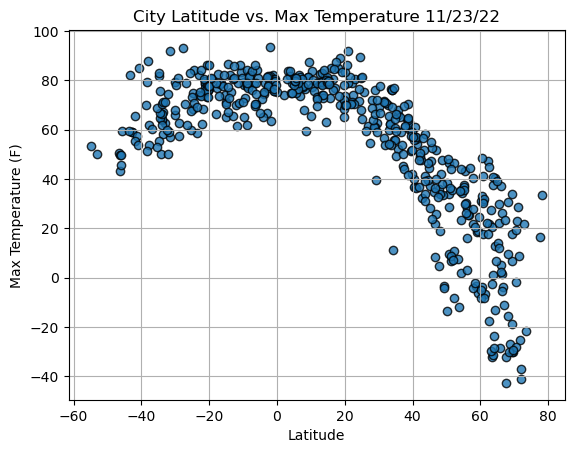

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

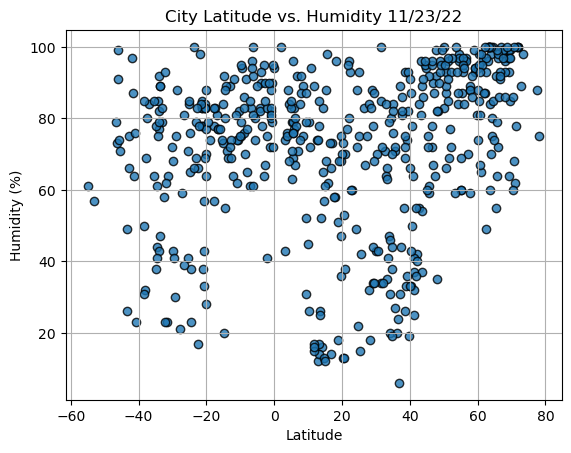

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

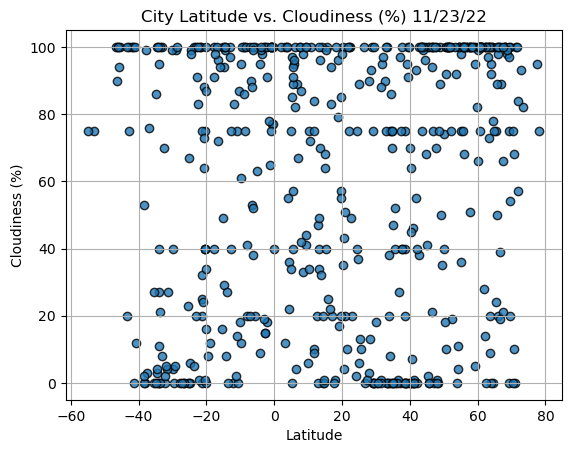

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

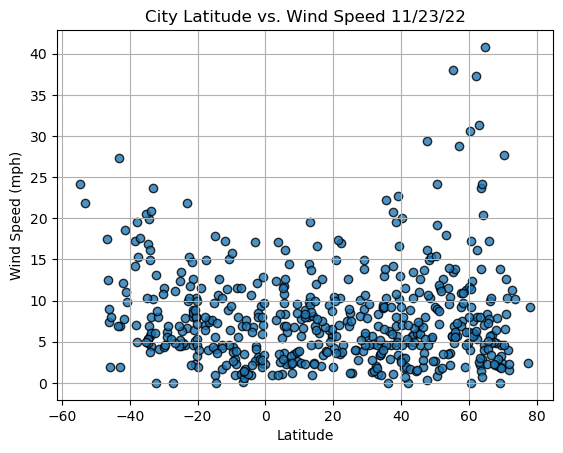

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                     Nhamunda
Country                        BR
Date          2022-11-23 19:40:35
Lat                       -2.1861
Lng                      -56.7131
Max Temp                    93.58
Humidity                       41
Cloudiness                     91
Wind Speed                   3.13
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
517    False
518     True
519     True
520     True
521     True
Name: Lat, Length: 522, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kushima,JP,2022-11-23 19:40:30,31.4583,131.2333,56.44,85,1,5.66
2,Sinnamary,GF,2022-11-23 19:36:32,5.3833,-52.9500,81.00,79,97,10.78
4,Bua Yai,TH,2022-11-23 19:40:31,15.5855,102.4259,72.99,98,100,4.68
5,Andenes,NO,2022-11-23 19:40:32,69.3143,16.1194,33.78,64,0,13.80
6,Marzuq,YE,2022-11-23 19:40:33,14.4000,46.4667,63.25,65,0,2.42


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

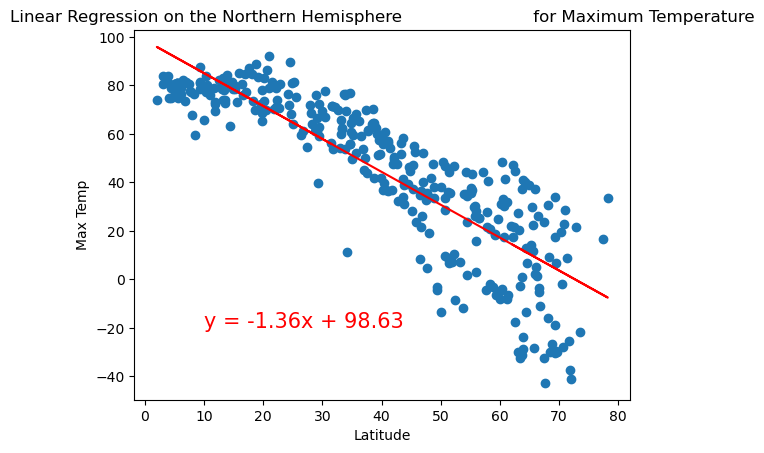

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

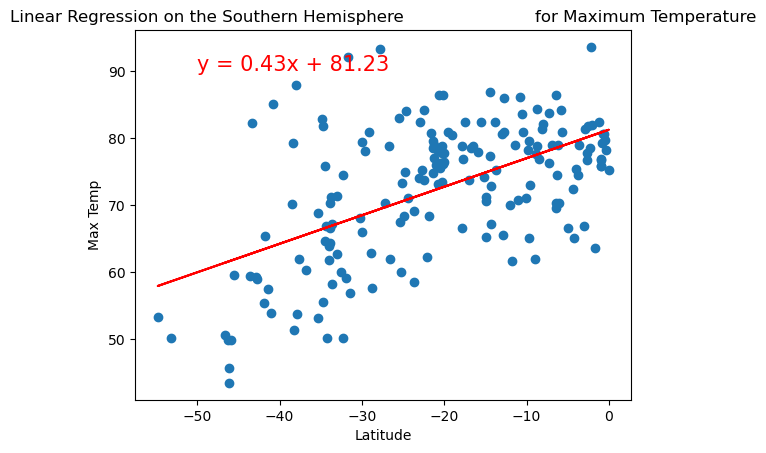

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

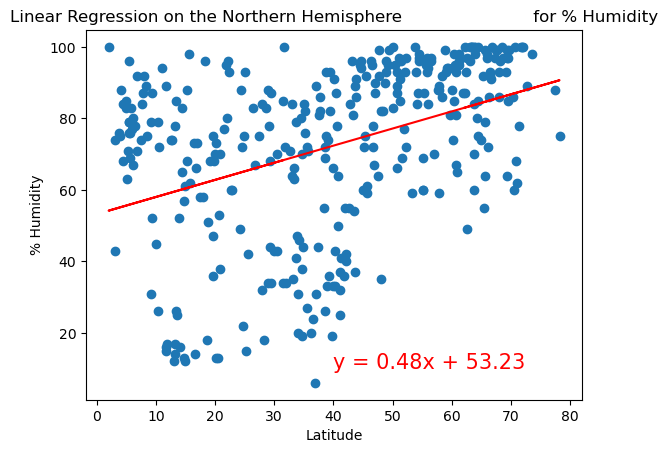

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

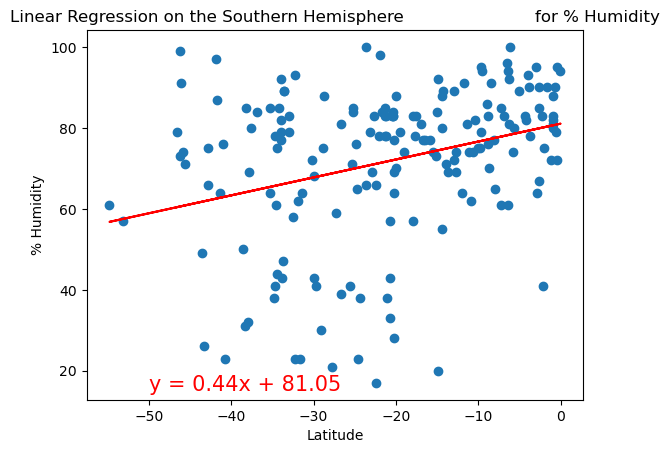

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

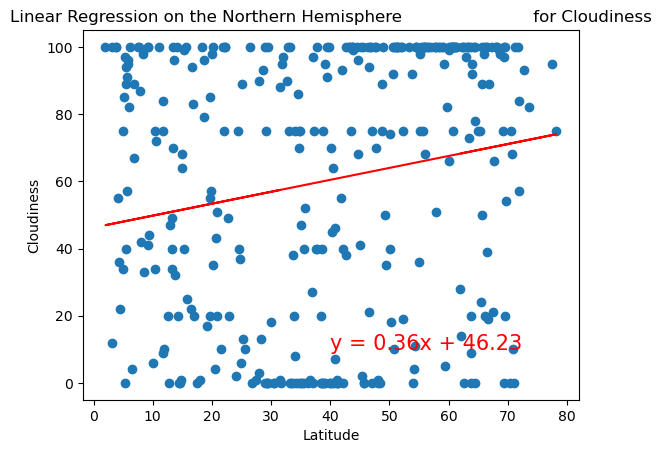

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

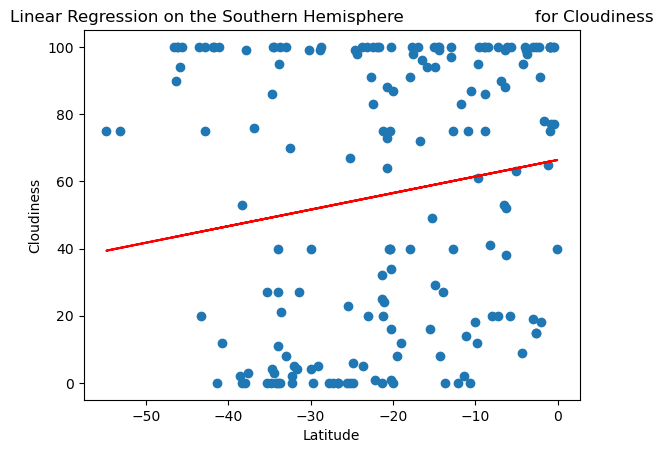

In [37]:
# Linear regression on the Souther Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

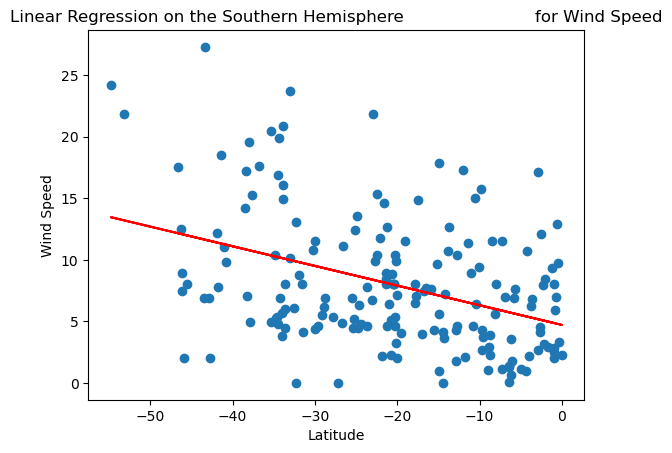

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))